In [1]:
from fynesse import access, assess, address

from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
from config import MODELS, EVENTS, SEEDS

## Data Clean-Up

In [4]:
model = 'resnet50'
seed = 42

for trial in [1, 2, 3, 4, 5]:
    for event in EVENTS:
        event_hash = address.hash(event)
        access.process(f'../experiments/results/rp/t{trial}/{model}_{event_hash}_s{seed}.txt', f'./data/csv/rp/t{trial}/{model}_{event_hash}_s{seed}.csv')


## Data Preprocessing

In [16]:
model = 'resnet50'
event = EVENTS[8]
seed = 42

master_list = list()

for trial in [1, 2, 3, 4, 5]:
    event_hash = address.hash(event)
    df = access.load_df(f'./data/csv/rp/t{trial}/{model}_{event_hash}_s{seed}.csv')
    
    inferences = assess.extract_inferences(df)
    # master_list += list(map(partial(address.make_timeseries, event=event), inferences))
    master_list.append(address.make_timeseries(inferences[4], event=event))


In [ ]:
master_dict = dict()

model = 'resnet50'

for event in EVENTS:
    event_hash = address.hash(event)
    master_list = list()

    for trial in [1, 2, 3, 4, 5]:

        for seed in SEEDS:

            df = access.load_df(f'./data/csv/rp/t{trial}/{model}_{event_hash}_s{seed}.csv')
            inferences = assess.extract_inferences(df)

            master_list += list(map(partial(address.make_timeseries, event=event), inferences))

    master_dict[event] = master_list
            
assess.make_pickle(f'./data/pickle/rp.pickle', master_dict)

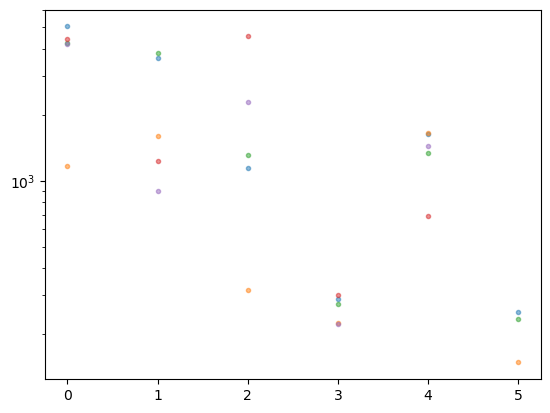

In [17]:
fig, ax = plt.subplots()

for timeseries in master_list:
    timeseries = address.aggregate(timeseries, bin_size=128)
    ax.scatter(np.arange(len(timeseries)), timeseries, marker='.', alpha=0.5)

ax.set_yscale('log')

plt.show()

In [ ]:
def calc_euclidean(actual, predic):
    return np.sqrt(np.sum((actual - predic) ** 2))

def calc_mape(actual, predic):
    return np.mean(np.abs((actual - predic) / actual))

def calc_correlation(actual, predic):
    a_diff = actual - np.mean(actual)
    p_diff = predic - np.mean(predic)
    numerator = np.sum(a_diff * p_diff)
    denominator = np.sqrt(np.sum(a_diff ** 2)) * np.sqrt(np.sum(p_diff ** 2))
    return numerator / denominator

In [20]:
fig, ax = plt.subplots()

for timeseries in master_list:
    timeseries = address.aggregate(timeseries, bin_size=128)
    ax.scatter(np.arange(len(timeseries)), timeseries, marker='.', alpha=0.5)

ax.set_yscale('log')

plt.show()

array([4221.,  894., 2281.,  222., 1441.])

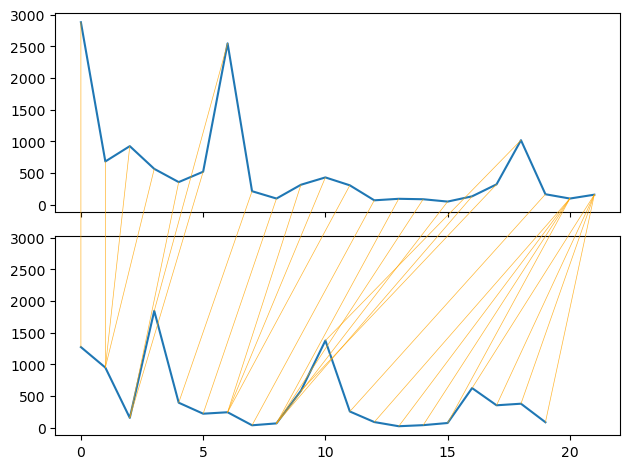

In [26]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

s1 = address.aggregate(master_list[0], bin_size=32)
s2 = address.aggregate(master_list[4], bin_size=32)

path = dtw.warping_path(s1, s2)

dtwvis.plot_warping(s1, s2, path)
plt.show()